<font size="5"> Цель исследования - выявить определяющие популярность игр закономерности с целью планирования рекламных кампаний потенциально популярных продуктов.

# Общая информация

Загрузим библиотеки

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

Просмотрим фаил с данными и изучим общую информацию.

In [ ]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Итак, всего 11 колонок. Сразу видно множество пропусков. Кроме того достаточно странный формат года релиза игры.

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Более половины игр не имеют оценки критиков. Так же множество пропусков в колонке "оценка пользователей" и "возрастная категория".

# Подготовка данных

## Столбцы

Приведем все буквы в названиях столбцов к нижнему ругистру.

In [ ]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Типы данных

Годы выпуска игр указанны в формате Float. Не очень удобно, однако тот факт что в этой колонке 269 пропусков, врядли получится перевести данные в формат int. Оставим пока как есть.

Так же в колонках продаж использованы дробные числа. Учитывая факт что данные казаны в миллионах, мы можем перевести данные в тысячи тем самым переведя все числа в формат int.

In [ ]:
df['na_sales'] = (df['na_sales'] * 1000).astype(int)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41360,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29080,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15680,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15610,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,10,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df['jp_sales'] = (df['jp_sales'] * 1000).astype(int)
df['eu_sales'] = (df['eu_sales'] * 1000).astype(int)
df['other_sales'] = (df['other_sales'] * 1000).astype(int)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41360,28960,3770,8450,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29080,3580,6810,770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15680,12760,3790,3290,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15610,10930,3280,2950,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0,0,10,0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0,10,0,0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0,0,10,0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,10,0,0,0,NaN,NaN,NaN


## Пропуски

Так как число пропусков в колонке "year_of_release" 269, что составляет чуть более полутора процентов от общего датафрейма, считаю возможным удалить эти данные. Кроме того эти пропуски не позволят проанализировать количество игр выпущенных по годам.

После удаления пропусков, мы можем привести данные к  целым числам.

In [ ]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype(int)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006,Sports,0,10,0,0,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10,0,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003,Platform,10,0,0,0,NaN,NaN,NaN


Посмотрим, какие значения встречаются в колонке "rating".

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Заполним пропуски строковым значением "unknown"

In [ ]:
df['rating'] = df['rating'].fillna('unknown')

In [ ]:
df = df.dropna(subset=['name', 'genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Остальные пропуски пока врядли получится обработать, так как ни среднее ни медианное значение не будут отражать реальные или близкие данные. Кроме того, отсутствует какая-либо логика в пропусках, так как они встречаются как у новых, так и у старых игр вне зависимости от жанра или платформы.

Посмотрим на категории данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  int32  
 5   eu_sales         16444 non-null  int32  
 6   jp_sales         16444 non-null  int32  
 7   other_sales      16444 non-null  int32  
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(1), int32(5), object(5)
memory usage: 1.2+ MB


In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В обеих колонках множество различных оценок, однако в колонке "user_score" встречается абривеатура 'tbd', а так же тип данных 'object'.

In [ ]:
df.query('user_score == "tbd"').count()

name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2376
dtype: int64

Много

In [ ]:
display(df.query('user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3450,2590,0,660,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2080,1350,0,540,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1510,1030,0,270,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1650,570,0,200,71.0,tbd,E
710,Just Dance Kids,Wii,2010,Misc,1520,540,0,180,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16426,Planet Monsters,GBA,2001,Action,10,0,0,0,67.0,tbd,E
16428,Bust-A-Move 3000,GC,2003,Puzzle,10,0,0,0,53.0,tbd,E
16429,Mega Brain Boost,DS,2008,Puzzle,10,0,0,0,48.0,tbd,E
16435,Plushees,DS,2008,Simulation,10,0,0,0,NaN,tbd,E


In [ ]:
display(df.query('user_score == "tbd" and jp_sales > 1000'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Кажется, на оценку пользователей влияют продажи в Японии. При условии что количество продаж в Японии более 1 миллиона, значение "tbd" не встречается. Буду считать это значение, как "оценка не определена"

Переведем данные в колонке 'user_score' в числовой формат

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  int32  
 5   eu_sales         16444 non-null  int32  
 6   jp_sales         16444 non-null  int32  
 7   other_sales      16444 non-null  int32  
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(2), int32(5), object(4)
memory usage: 1.2+ MB


## Суммарные продажи

Подсчитаем суммарные продажи во всех регионах и добавим их в отдельную колонку.

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8.0,E,82540
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,NaN,NaN,unknown,40240
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,8.3,E,35520
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,8.0,E,32770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,unknown,31380
...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,NaN,NaN,unknown,10
16442,LMA Manager 2007,X360,2006,Sports,0,10,0,0,NaN,NaN,unknown,10
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10,0,NaN,NaN,unknown,10
16444,Spirits & Spells,GBA,2003,Platform,10,0,0,0,NaN,NaN,unknown,10


# Исследовательский анализ данных

## Годы

Посмотрим как менялись тенденции по выпуску игр по годам.

In [ ]:
df.groupby('year_of_release')['name'].count() 

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

С 1980 года по 1993 мы видим незначительный рост количества выпуска компьютерных игр. С 1994 начинается серьъезный всплеск постоянный рост числа игр до 2008 года, достигнув максимума практически 1500 игр за 2008 год.Однако в 2012 году мы выидим значительное снижение числа игр. Довольно странно.

<AxesSubplot:>

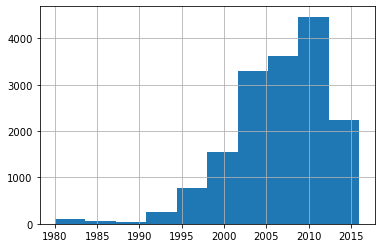

In [ ]:
df['year_of_release'].hist()

## Продажи по платформам

Посчитаем суммарные продажи по различным платформам за весь период, с целью определить 10 самых успешных.

In [ ]:
#grouped_platform = df.groupby('platform')['name'].count()

In [ ]:
platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform.columns = ['total_sales']
platform = platform.sort_values('total_sales', ascending=False)
platform

,total_sales
platform,
PS2,1233557
X360,961239
PS3,931336
Wii,891178
DS,802780
PS,727577
PS4,314140
GBA,312880
PSP,289530


In [ ]:
good_platform = platform.query('total_sales > 256000')
good_platform

,total_sales
platform,
PS2,1233557
X360,961239
PS3,931336
Wii,891178
DS,802780
PS,727577
PS4,314140
GBA,312880
PSP,289530


In [ ]:
df_best_platform = df.query('platform in @good_platform.index').reset_index()
df_best_platform

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8.0,E,82540
1,2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,82.0,8.3,E,35520
2,3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,80.0,8.0,E,32770
3,6,New Super Mario Bros.,DS,2006,Platform,11280,9140,6500,2880,89.0,8.5,E,29800
4,7,Wii Play,Wii,2006,Misc,13960,9180,2930,2840,58.0,6.6,E,28910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12165,16439,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,10,0,0,0,NaN,NaN,unknown,10
12166,16440,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0,0,0,0,NaN,NaN,unknown,0
12167,16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,NaN,NaN,unknown,10
12168,16442,LMA Manager 2007,X360,2006,Sports,0,10,0,0,NaN,NaN,unknown,10


Построим распределение продаж по годам для лучших игровых платформ.

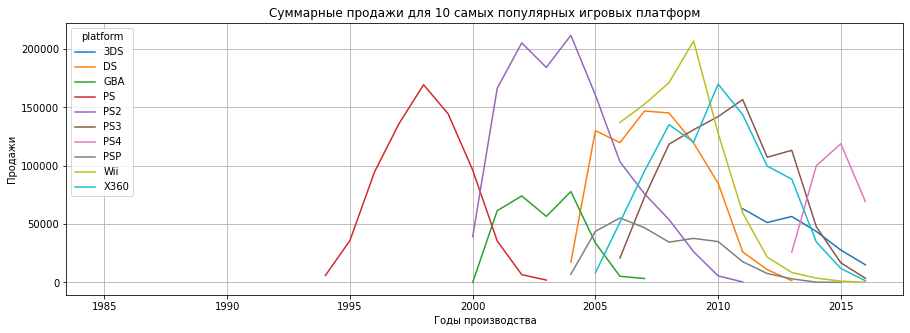

In [ ]:
df_best_platform.pivot_table(
    index = 'year_of_release', columns = 'platform', 
    values = 'total_sales', aggfunc ='sum').plot(figsize=(15, 5))
plt.title('Суммарные продажи для 10 самых популярных игровых платформ')
plt.xlabel('Годы производства')
plt.ylabel('Продажи')
plt.grid(True)

Каждая игровая платформа продается в течении 5-10 лет, после чего продажи сходят на нет. Особенно показательны графики по платформам PS разных поколений. Появление нового пересекается со значительным спадом предыдущего.

## Актуальный период

Еще раз посмотрим продажи всех игр по годам, чтобы определить актуальный период для построения прогноз на 2017 год

In [ ]:
df.groupby('year_of_release')['total_sales'].sum() 

year_of_release
1980     11380
1981     35680
1982     28880
1983     16800
1984     50350
1985     53950
1986     37080
1987     21699
1988     47210
1989     73450
1990     49370
1991     32230
1992     76160
1993     45990
1994     79230
1995     88120
1996    199150
1997    201068
1998    256310
1999    251109
2000    201659
2001    331459
2002    394969
2003    357540
2004    418679
2005    457819
2006    517710
2007    604748
2008    671500
2009    658818
2010    590130
2011    507577
2012    355839
2013    361240
2014    331529
2015    267980
2016    129940
Name: total_sales, dtype: int32

С 2012 по 2016 год ежегодная выручка от продажи выпущенных компьютерных игр установилось на отметке 350-270 млн за год. После стремительного эволюционирования и роста спроса на компьютерные игры, кажется и геймеры и производители определились в предпочтениях как по играм так и по игровым платформам. Возможно, это причична стабилизации рынка на указанных отметках.

Так как не имеет смысла учитывать более ранние годы, обрежем датафрейм по 2014 году.

In [ ]:
df_actual = df.query('year_of_release >= 2014')

## Анализ платформ

Определим лидирующие по продажам платформы.

In [ ]:
df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288150
XOne    140360
3DS      86680
PS3      68179
X360     48220
WiiU     42980
PC       27050
PSV      22400
Wii       5070
PSP        360
Name: total_sales, dtype: int32

Не удивительно, что лидерами продаж являются современные версии самых популярных платформ - PS и X360

В тоже время, удивительный факт, платформа PS4 не попадая в первую десятку по продажам за все время, является абсолютным лидером по продажам за последние пять лет. 

Посмотрим тенденции продаж для первой пятерки (так как остальные сильно уступают по продажам) за актуальный период

Text(0, 0.5, 'Продажи')

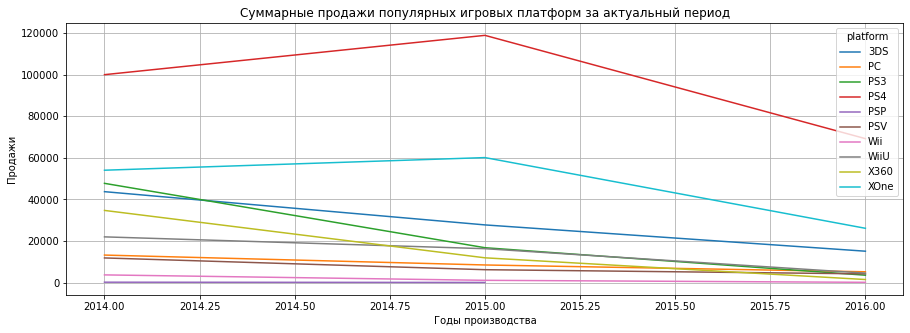

In [ ]:
df_actual.pivot_table(    
    index = 'year_of_release', columns ='platform', 
    values = 'total_sales', aggfunc = 'sum').plot(grid=True, figsize=(15, 5))
plt.title('Суммарные продажи популярных игровых платформ за актуальный период')
plt.xlabel('Годы производства')
plt.ylabel('Продажи')

Намного нагляднее. Более того, падение 16 года можносписать на неполный период в датафрейме

Все выбранные платформы показывают спад в 2016 году. 

Отдельно посмотрим продажи за 2016 год.

In [ ]:
df_actual.query('year_of_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69250
XOne    26150
3DS     15140
PC       5250
WiiU     4600
PSV      4250
PS3      3600
X360     1520
Wii       180
Name: total_sales, dtype: int32

Очевидно, PS4 самая популярная игровая консоль, несмотря на тот факт что в 2012 году продаж вообще не было (видимо поступила в продажу толко в 2013). Продажи PS4 значительно превышают продажи других консолей.

Кроме того, можно обратить внимание на платформы XOne и 3DS хотя продажи последней значительно снижаются с 2013 года

## Ящик с усам

Построим график по глобальным продажам игр в разбивке по игровым платформам.

Text(0, 0.5, 'Продажи')

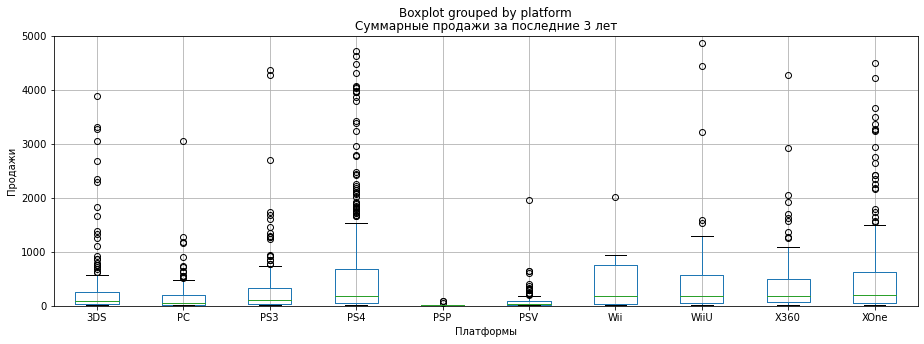

In [ ]:
df_actual.boxplot(column='total_sales', by='platform', figsize=(15, 5))
plt.ylim(0, 5000)
plt.title('Суммарные продажи за последние 3 лет')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

Очередное подтверждение лидерства PS и Xbox различных поколений.

Text(0, 0.5, 'Продажи')

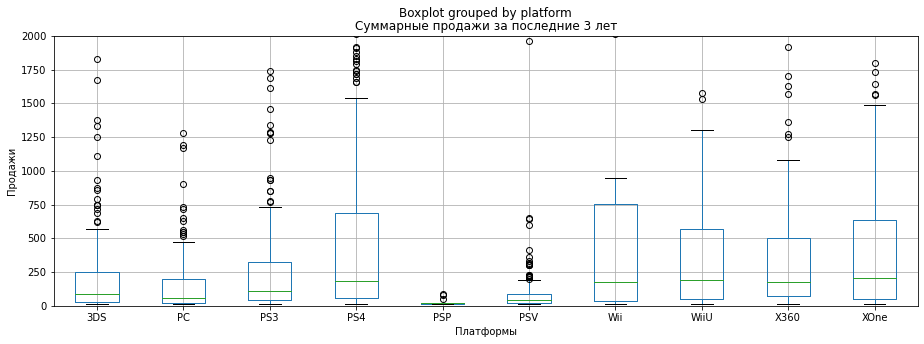

In [ ]:
df_actual.boxplot(column='total_sales', by='platform', figsize=(15, 5))
plt.ylim(0, 2000)
plt.title('Суммарные продажи за последние 3 лет')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

## Диаграмма рассеяния и корреляция

Оценим влияние оценки пользователей и критиков при помощи графиков рассеяния и посчитаем корреляцию на примере консоли PS4.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

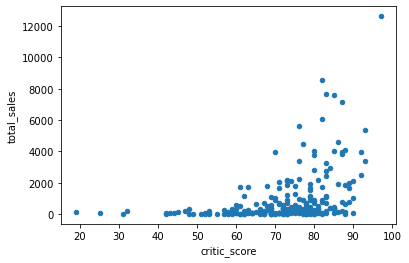

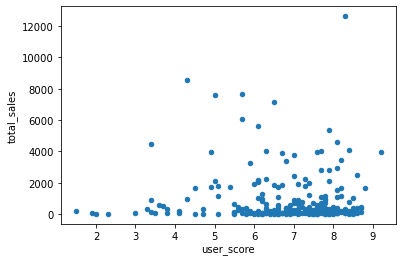

In [ ]:
PS4 = df_actual.query('platform == "PS4"')
PS4.plot(x='critic_score', y='total_sales', kind='scatter')
PS4.plot(x='user_score', y='total_sales', kind='scatter')


Согласно графиков, только оценка критиков имеет незначительное влияние на уровень продаж.

In [ ]:
PS4['total_sales'].corr(PS4['critic_score'])

0.40266141068104083

In [ ]:
PS4['total_sales'].corr(PS4['user_score'])


-0.040131589472697314

Действительно, корреляция показывает небольшую прямую связь между оценкой критиков и общим уровнем продаж игр для PS4. В то же время оценка пользователей никакого влияния на продажи не имеет.

Проведем такой же анализ для всех платформ.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

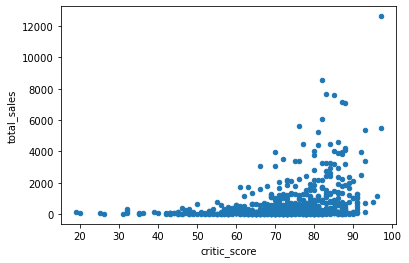

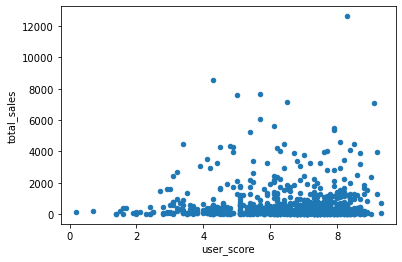

In [ ]:
df_actual.plot(x='critic_score', y='total_sales', kind='scatter')
df_actual.plot(x='user_score', y='total_sales', kind='scatter')

In [ ]:
df_actual['critic_score'].corr(df_actual['total_sales'])

0.32810508696636337

In [ ]:
df_actual['user_score'].corr(df_actual['total_sales'])

-0.013070305002484557

Мы видим похожий результат. Оценка критиков влияет на повышение уровня продаж.

## Распределение по жанрам

Оценим общее количество игр за актуальный период по жанрам.

In [ ]:
genre_grouped = df_actual.groupby('genre')['name'].count()
genre_grouped.sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

Наибольшее количество игр произведенные в актуальный период имеют жанр 'Action'. 

In [ ]:
genre_grouped = df_actual.groupby('genre')['total_sales'].sum()
genre_grouped.sort_values(ascending=False)

genre
Action          199360
Shooter         170940
Sports          109480
Role-Playing    101440
Misc             37549
Fighting         28220
Racing           27520
Platform         18090
Adventure        17550
Simulation       13130
Strategy          3960
Puzzle            2210
Name: total_sales, dtype: int32

Так же логично что игры самого популярного жанра имеют самое большое количество продаж. Однако, удивляют высокие продажи жанра 'Shooter'. Учитывая тот факт, что новые игры этого жанра выпускались более чем в 4 раза реже, они имеют сопоставимые продажи с играми жанра 'Action', что говорит об их высочайщей популярности. Кроме того высокую популярность как у производителей игра так и у геймеров имеют жанры 'Role-Playing' и 'Sports'.


В то же время следуют отметить крайне низкие продажи игр жанра 'Adventure', не смотря на достаточно большое количество созданных игр этого жанра.

<AxesSubplot:>

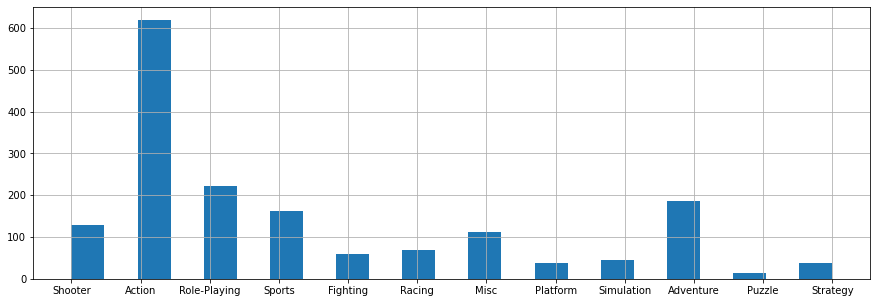

In [ ]:
df_actual['genre'].hist(bins=23, figsize=(15, 5))

# Портрет пользователя

Создадим портрет пользователя, анализирую лучшие платформы и игры, а так же рейтинг ESRB для каждого региона

## North America

Посмотрим топ платформ в регионе

In [ ]:
platform_na = df_actual.groupby('platform')['na_sales'].sum()
platform_na.sort_values(ascending=False)

platform
PS4     98610
XOne    81270
X360    28300
3DS     22640
PS3     22049
WiiU    19360
PC       7230
PSV      2520
Wii      2080
PSP         0
Name: na_sales, dtype: int32

Очевидное лидерство новых версий PS и Xbox.

In [ ]:
genre_na = df_actual.groupby('genre')['na_sales'].sum()
genre_na.sort_values(ascending=False)

genre
Shooter         79020
Action          72530
Sports          46130
Role-Playing    33470
Misc            15049
Fighting        12430
Racing           8740
Platform         6790
Adventure        5640
Simulation       2630
Strategy          980
Puzzle            650
Name: na_sales, dtype: int32

Так же самые предпочитаемые жанры в Северной Америке это Action и Shooter, продажи которых значительно превышат продажи других видов.

In [ ]:
rating_na = df_actual.groupby('rating')['na_sales'].sum()
rating_na.sort_values(ascending=False)

rating
M          96420
unknown    64719
E          50740
T          38950
E10+       33230
Name: na_sales, dtype: int32

Лидерами продаж в Северной Америке являются игры для взрослых старше 17 лет. Хотя это логино, так как популярный жанр - 'shooter' зачастую подразумевает определенный уровень жестокости и,соответсвтенно, имеем возрастные ограничения.

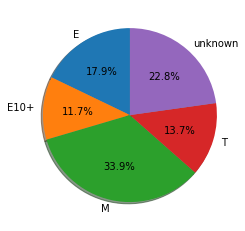

In [ ]:
fig, ax = plt.subplots() 
ax.pie(rating_na, labels=rating_na.index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.show() 

Самыми популярными остаются игры для взрослых. Между остальными категориями проценты распределены примерно одинаково.

## Europe

In [ ]:
platform_eu = df_actual.groupby('platform')['eu_sales'].sum()
platform_eu.sort_values(ascending=False)

platform
PS4     130040
XOne     46250
PS3      25540
PC       17970
3DS      16120
X360     15490
WiiU     13150
PSV       3530
Wii       2590
PSP          0
Name: eu_sales, dtype: int32

Ситуация схожа с Северной Америкой, однако в отличие от СА здесь платформы PS имеют значительно большую популярность чем Xbox.

In [ ]:
genre_eu = df_actual.groupby('genre')['eu_sales'].sum()
genre_eu.sort_values(ascending=False)

genre
Action          74680
Shooter         65520
Sports          45730
Role-Playing    28170
Racing          14130
Misc            12860
Simulation       7300
Platform         6800
Fighting         6690
Adventure        6490
Strategy         1790
Puzzle            520
Name: eu_sales, dtype: int32

Та же ситуация. Мы четко определили популярнейшие жанры.

In [ ]:
rating_eu = df_actual.groupby('rating')['eu_sales'].sum()
rating_eu.sort_values(ascending=False)

rating
M          93440
unknown    58950
E          58060
T          34070
E10+       26160
Name: eu_sales, dtype: int32

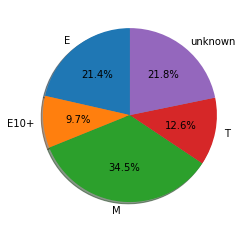

In [ ]:
fig, ax = plt.subplots() 
ax.pie(rating_eu, labels=rating_eu.index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.show() 

И здесь все предельно логично

## Japan

In [ ]:
platform_jp = df_actual.groupby('platform')['jp_sales'].sum()
platform_jp.sort_values(ascending=False)

platform
3DS     44240
PS4     15020
PSV     14540
PS3     11220
WiiU     7310
PSP       360
XOne      320
X360       80
PC          0
Wii         0
Name: jp_sales, dtype: int32

В Японии другое распределение популярности. Наиболее популярная платформа 3DS (видимо, местного производства), продажи которой значительно превосходят конкурентов. Так же популярны платформы PS. В то же время платформы Xbox находятся в конце списка и являются наименее популярными.

In [ ]:
genre_jp = df_actual.groupby('genre')['jp_sales'].sum()
genre_jp.sort_values(ascending=False)

genre
Role-Playing    31160
Action          29580
Fighting         6370
Misc             5610
Shooter          4870
Adventure        3600
Sports           3260
Platform         2690
Simulation       2310
Racing           1760
Strategy          950
Puzzle            930
Name: jp_sales, dtype: int32

И снова Японцы выделились. Популярный жанр 'Shooter' в других странах, находится в середине списка в Японии, в то время как "Role-Playing" и "Action" является самым продаваемым жанром в Японии.

In [ ]:
rating_jp = df_actual.groupby('rating')['jp_sales'].sum()
rating_jp.sort_values(ascending=False)

rating
unknown    56900
T          14780
E           8940
M           8010
E10+        4460
Name: jp_sales, dtype: int32

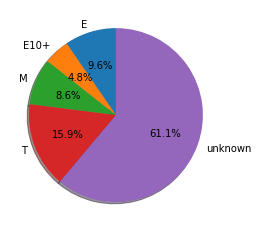

In [ ]:
fig, ax = plt.subplots() 
ax.pie(rating_jp, labels=rating_jp.index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.show() 

Необычные Японцы как обчно выделяются. Более 60% игр без возрастного рейтинга. Возможно в Японии данный критерий вообще не учитывается при создании игр, а те игры которые имеют рейтинги произведены в других странах. Просто предположение.

# Гипотезы

## Рейтинги платформ

Примем за нулевую гипотезу равенство средних значений генеральных совокупностей по оценке пользователей для платформ Xbox One и PS. 

Следовательно альтернативня гипотеза будет означать неравенство генеральных совокупностей.

In [ ]:
Xbox = df.query('platform == "XOne"')
Xbox = Xbox.dropna(subset=['user_score'])
PS = df.query('platform == "PS3"')
PS = PS.dropna(subset=['user_score'])
alpha = .05
results = st.ttest_ind(Xbox['user_score'], PS['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0830428703558185
Не получилось отвергнуть нулевую гипотезу


Cредние значения генеральных совокупностей по оценке пользователей для платформ Xbox One и PS равны.

## Рейтинг жанров

Примем за нулевую гипотезу равенство средних значений генеральных совокупностей по оценке пользователей для жанров Action и Sports.

Следовательно альтернативня гипотеза будет означать неравенство генеральных совокупностей.

In [ ]:
Action = df.query('genre == "Action"')
Action = Action.dropna(subset=['user_score'])
Sports = df.query('genre == "Sports"')
Sports = Sports.dropna(subset=['user_score'])
alpha = .05
results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Cредние значения генеральных совокупностей по оценке пользователей для жанров Action и Sports равны.

# Вывод

Исследование показало, что успешность игры определяется следующими критериями:
    
    1. Игровая платформа. Абсолютно видна популярность таких консолей как PS и Xbox, что делает игры, создаваемые для этих консолей наиболее успешными и продаваемыми. Предлагаю сделать акцент именно на современные модели указанных консолей. В то же время для Японского рынка необходимо делать корректировку смещая акценты на PS, 3DS и WiiU, исключая Xbox.
    2. Жанр. Здесь так же стоит выделить лидерство с огромным отрывом таких жанров как 'Action' и 'Shooter', а так же 'Role-Playing', который за счет японского рынка компьютерных игр является так же хорошо продаваемым.
    3. ESRB рейтинг. Сомневаюсь, что нужно делать какой-либо определенный акцент на этот критерий, так как его определяет тип жанра.
    4. Оценка критиков. При планировании рекламной кампании компьтерных игр также следует акцентировать внимание на оценку критиков. Так как существует прямая сывязь таких оценок с ростом продаж.